In [1]:
import os
import sys
import time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Modules dir
project_path = "<PATH-TO-REPO>/BiMAEB-UDD-RUL/"
sys.path.insert(0, project_path)

from Modules.Models import RULNeuralNetwork
from experimental_results.functions import (normalize_df,
                                            view_RUL_stats,
                                            view_performance_on_data,
                                            get_model_rul_predictions,
                                            get_scores,
                                            get_mse,
                                            plot_unit_recon_error_and_threshold,
                                            plot_rul_predictions_and_targets,
                                            normalize_df_with_context,
                                            TURBOFAN_FEATURES_LIST)

In [2]:
normal_op_len = 45
norm_op_len_as_pct = True

dataset = "FD004"
model_type = "AE"
prefix = "Pct" if norm_op_len_as_pct else "Len"


print(f"Normality: {normal_op_len} {prefix}")

Normality: 45 Pct


In [3]:
model_name = f"normOp{prefix}{normal_op_len}_RUL_{model_type}"

path_to_training_data_dir = "<PATH-TO-DATA-DIR>/NASA_turbofan_data/train"
path_to_testing_data_dir = "<PATH-TO-DATA-DIR>/NASA_turbofan_data/validation"


# Define file names
csv_file_training = f"{dataset}_train_unsupervised_labels_AutoEncoder_Op{prefix}{normal_op_len}.csv"
csv_file_testing = f"{dataset}_test_unsupervised_labels_AutoEncoder_Op{prefix}{normal_op_len}.csv"

# Define paths
dataset_path_training = os.path.join(path_to_training_data_dir, csv_file_training)
dataset_path_testing = os.path.join(path_to_testing_data_dir, csv_file_testing)

path_to_model_state_dict = f"models/{model_name}_model_state_dict"

print(f"Model Path: {path_to_model_state_dict}")

Model Path: models/normOpPct45_RUL_AE_model_state_dict


In [4]:
# Read original data
print(f"Reading dataset: \n{dataset_path_testing}\n")
print(f"Reading dataset: \n{dataset_path_training}")

df_testing_not_normalized = pd.read_csv(dataset_path_testing)
df_training_not_normalized = pd.read_csv(dataset_path_training)

Reading dataset: 
/Users/rafaeltoche/Documents/School/Research/Rainwaters_Lab/DART-LP2/Condition_Monitoring/data/NASA_turbofan_data/validation/FD004_test_unsupervised_labels_AutoEncoder_OpPct45.csv

Reading dataset: 
/Users/rafaeltoche/Documents/School/Research/Rainwaters_Lab/DART-LP2/Condition_Monitoring/data/NASA_turbofan_data/train/FD004_train_unsupervised_labels_AutoEncoder_OpPct45.csv


In [5]:
print("Normalizing datasets...\n")

# Normalize testing data using training data as the context.
df_testing_normalized = normalize_df_with_context(df=df_testing_not_normalized,
                                                  df_context=df_training_not_normalized,
                                                  model_features=TURBOFAN_FEATURES_LIST)

Normalizing datasets...



In [6]:
# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using Device: {}".format(device))

Using Device: cpu


In [7]:
window_size = 1
metrics_dir = "model"
ts_number_features = len(TURBOFAN_FEATURES_LIST)
latent_size = 16

print(f"Normality Length: {normal_op_len}")
print(f"Latent Size: {latent_size}")
print(f"Number ts features: {ts_number_features}")

Normality Length: 45
Latent Size: 16
Number ts features: 24


In [8]:
model = RULNeuralNetwork(ts_number_features=ts_number_features,
                         device=device,
                         model_name="",
                         metrics_dir=metrics_dir)

print(f"Reading model at '{path_to_model_state_dict}'")
model.load_state_dict(torch.load(path_to_model_state_dict, map_location=torch.device(device)))

Reading model at 'models/normOpPct45_RUL_AE_model_state_dict'


<All keys matched successfully>

In [9]:
view_performance_on_data(model=model, 
                         df=df_testing_normalized, 
                         identifier_col="unit", 
                         cycle_col="cycle", 
                         rul_col="RUL", 
                         fault_col="fault")

Computing RUL for Unit 1 (on cycle=230)
Target: 22 --> Pred.:  46

Computing RUL for Unit 2 (on cycle=153)
Target: 39 --> Pred.:  43

Computing RUL for Unit 3 (on cycle=141)
Target: 107 --> Pred.:  69

Computing RUL for Unit 4 (on cycle=208)
Target: 75 --> Pred.:  161

Computing RUL for Unit 5 (on cycle=51)
Target: 149 --> Pred.:  40

Computing RUL for Unit 6 (on cycle=146)
Target: 78 --> Pred.:  109

Computing RUL for Unit 7 (on cycle=54)
Target: 94 --> Pred.:  80

Computing RUL for Unit 8 (on cycle=248)
Target: 14 --> Pred.:  21

Computing RUL for Unit 9 (on cycle=284)
Target: 99 --> Pred.:  99

Computing RUL for Unit 10 (on cycle=23)
Target: 162 --> Pred.:  147

Computing RUL for Unit 11 (on cycle=82)
Target: 143 --> Pred.:  97

Computing RUL for Unit 12 (on cycle=270)
Target: 7 --> Pred.:  8

Computing RUL for Unit 13 (on cycle=227)
Target: 71 --> Pred.:  40

Computing RUL for Unit 14 (on cycle=102)
Target: 105 --> Pred.:  96

Computing RUL for Unit 15 (on cycle=168)
Target: 12 -->

Computing RUL for Unit 125 (on cycle=21)
Target: 184 --> Pred.:  84

Computing RUL for Unit 126 (on cycle=220)
Target: 15 --> Pred.:  14

Computing RUL for Unit 127 (on cycle=98)
Target: 195 --> Pred.:  83

Computing RUL for Unit 128 (on cycle=139)
Target: 126 --> Pred.:  124

Computing RUL for Unit 129 (on cycle=315)
Target: 120 --> Pred.:  121

Computing RUL for Unit 130 (on cycle=107)
Target: 165 --> Pred.:  127

Computing RUL for Unit 131 (on cycle=193)
Target: 101 --> Pred.:  93

Computing RUL for Unit 132 (on cycle=115)
Target: 116 --> Pred.:  81

Computing RUL for Unit 133 (on cycle=74)
Target: 126 --> Pred.:  127

Computing RUL for Unit 134 (on cycle=266)
Target: 36 --> Pred.:  45

Computing RUL for Unit 135 (on cycle=435)
Target: 7 --> Pred.:  10

Computing RUL for Unit 136 (on cycle=56)
Target: 122 --> Pred.:  52

Computing RUL for Unit 137 (on cycle=291)
Target: 159 --> Pred.:  58

Computing RUL for Unit 138 (on cycle=239)
Target: 88 --> Pred.:  98

Computing RUL for Unit 13

In [10]:
list(df_testing_normalized.query("fault==1")["unit"].unique())

[8,
 12,
 15,
 22,
 25,
 31,
 32,
 35,
 38,
 40,
 44,
 47,
 49,
 58,
 61,
 62,
 65,
 68,
 69,
 70,
 71,
 73,
 82,
 91,
 100,
 101,
 102,
 111,
 114,
 116,
 118,
 121,
 126,
 135,
 150,
 151,
 155,
 158,
 159,
 173,
 179,
 180,
 181,
 183,
 184,
 194,
 197,
 202,
 206,
 209,
 213,
 216,
 224,
 235,
 237,
 238,
 244,
 248]

Predicted 55 Samples in unit 202
Score: 97.08858186832636
MSE: 101.88510496540161


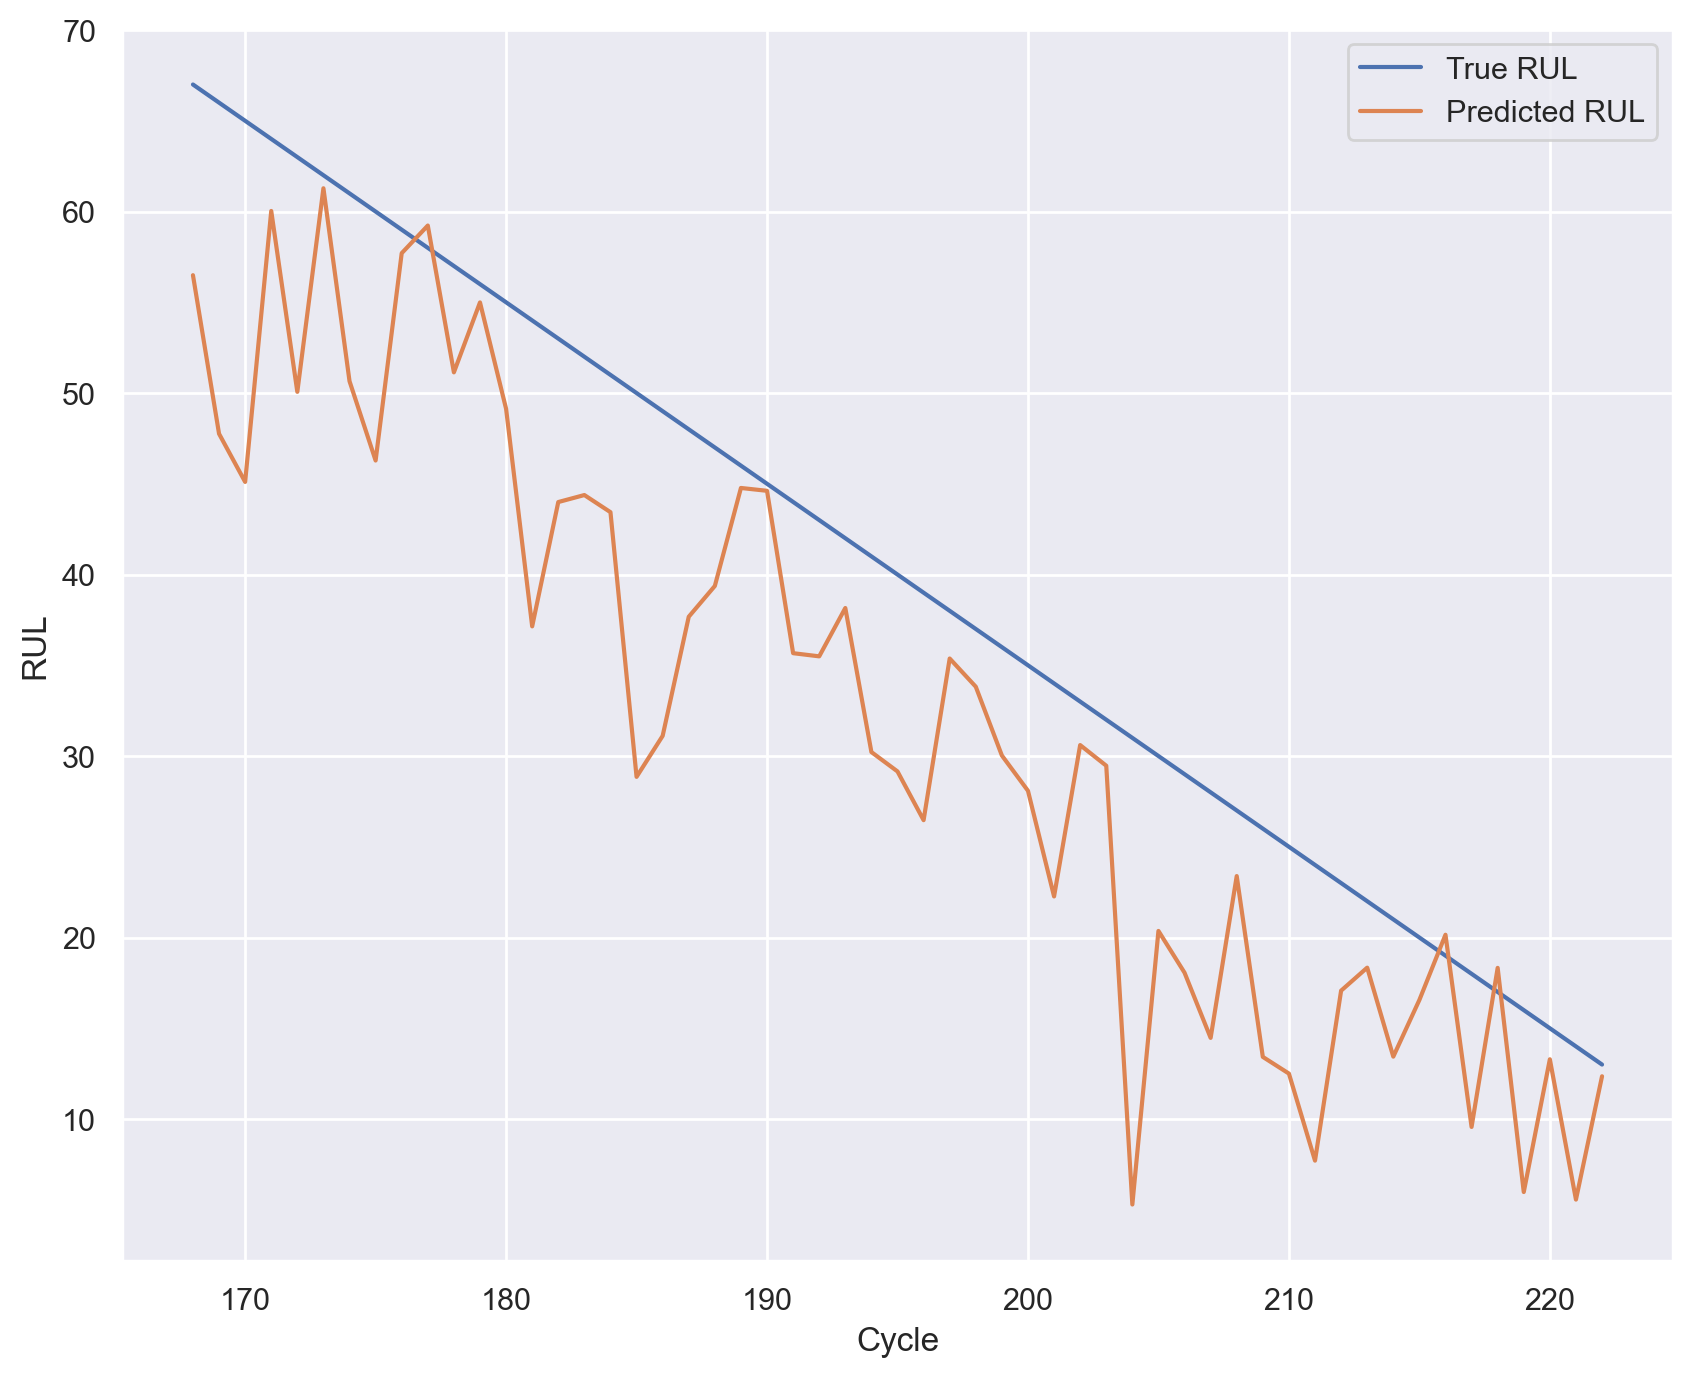

In [18]:
unit = 202
query_faults = True

df_unit = df_testing_normalized.query(f"unit=={unit}")
if query_faults:
    df_unit = df_unit.query("fault==1")
features = df_unit[TURBOFAN_FEATURES_LIST].to_numpy()
targets = df_unit["RUL"].to_numpy()
cycles = df_unit["cycle"].to_numpy()

rul_predictions = get_model_rul_predictions(model, features)
print(f"Predicted {len(rul_predictions)} Samples in unit {unit}")
plot_rul_predictions_and_targets(rul_predictions, targets=targets, cycles=cycles)